In [83]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

In [84]:
df_rt1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [85]:
df_rt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [86]:
df_rt2 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_1')

In [87]:
# Merging the two RT dataframes
df_rt = df_rt1.merge(df_rt2, how='inner', on='id')

In [88]:
import string
df_rt['box_office'] = df_rt['box_office'].str.replace('[{}]'.format(string.punctuation), '')
# Removes the commas from the box office column

In [89]:
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: float(x))
# Changes the boc office column to floats

In [90]:
df_rt['runtime'] = df_rt['runtime'].str.strip('minutes')
# Strips the 'minutes' from the runtime column so that we can convert to an int 

In [91]:
df_rt['theater_date'] = pd.to_datetime(df_rt['theater_date'], )
# Changes release date from string to datetime 

In [92]:
df_rt.dropna(subset=['rating_y'], inplace=True)
# drops null values in the rating column

In [93]:
ratings = list(df_rt['rating_y'].value_counts().index[0:186])

In [94]:
def standardize(rating):
    if rating.endswith('5') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-2:])) * 100
    elif rating.endswith('5') and '/' in rating:
        return (float(rating[0]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating:
        return (float(rating[0]) / float(rating[-2:])) * 100
    elif rating == 'A+':
        return 98
    elif rating == 'A':
        return 95
    elif rating == 'A-':
        return 92
    elif rating == 'B+':
        return 88
    elif rating == 'B':
        return 85
    elif rating == 'B-':
        return 82
    elif rating == 'C+':
        return 78
    elif rating == 'C':
        return 75
    elif rating == 'C-':
        return 72
    elif rating == 'D+': 
        return 68
    elif rating == 'D':
        return 65
    elif rating == 'D-':
        return 62
        

In [95]:
standardized_list = []
for rating in ratings:
    new_rating = standardize(rating)
    standardized_list.append(new_rating)

In [96]:
standardized_list.index(110.00000000000001)

91

In [97]:
df_rt['rating_y'] = df_rt['rating_y'].apply(standardize)

In [98]:
df_rt.dropna(subset=['rating_y'], inplace=True)

In [99]:
df_rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,A distinctly gallows take on contemporary fina...,60.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,"Quickly grows repetitive and tiresome, meander...",75.0,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,Cronenberg is not a director to be daunted by ...,40.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,"While not one of Cronenberg's stronger films, ...",82.0,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
13,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,The anger over the injustice of the financial ...,85.0,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54424,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,Dawdles and drags when it should pop; it doesn...,30.0,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54428,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,20.0,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,40.0,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,50.0,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


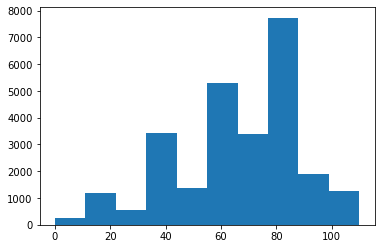

In [100]:
fig, ax = plt.subplots()
ax.hist(df_rt['rating_y']);

In [101]:
df_rt.dropna(subset=['box_office'], inplace=True)

In [102]:
def fresh(rating):
    if rating == 'fresh':
        return 1
    elif rating == 'rotten':
        return 0 

In [103]:
df_rt['fresh'] = df_rt['fresh'].apply(fresh)

In [104]:
df_rt['currency'].value_counts()

$    15686
Name: currency, dtype: int64

In [105]:
df_rt['rating_y'] = df_rt.groupby('id')['rating_y'].transform(
    lambda grp: np.mean(grp)
)
df_rt['fresh'] = df_rt.groupby('id')['fresh'].transform(
    lambda grp: np.mean(grp)
)

In [106]:
df_rt = df_rt.drop_duplicates(subset='id')

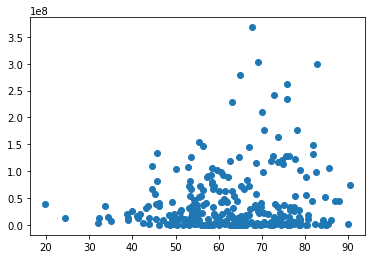

In [107]:
fig, ax = plt.subplots()
x = df_rt['rating_y']
y = df_rt['box_office']
ax.scatter(x,y);

In [114]:
df_rt.groupby('writer').mean()['rating_y'].sort_values(ascending=False)[0:20]

writer
Ethan Coen|Joel Coen                               90.383333
Ji Feng                                            90.000000
Michel Hazanavicius                                87.861789
Sofia Coppola                                      86.978947
Phyllis Nagy                                       86.116071
Jack Rosenthal|Karey Kirkpatrick                   85.625000
Ciro Guerra|Jacques Toulemonde Vidal               85.333333
Louis Malle                                        84.857143
Martin McDonagh                                    84.748387
Tim Burton|Caroline Thompson|Michael McDowell      84.147059
Paul Laverty                                       83.818182
John Logan|Robert Wade|Neal Purvis                 82.777778
Danis Tanovic                                      82.263158
Judd Apatow                                        81.866667
Michael Crichton|David Koepp|Malia Scotch Marmo    81.631579
Bob Nelson                                         80.654206
Sean Penn        

In [28]:
df_rt.groupby('rating_x').mean()

,id,box_office,rating_y,fresh,top_critic
rating_x,,,,,
G,1309.000000,2.284580e+07,65.141945,0.576329,0.142857
NR,1154.071429,6.628353e+05,67.271617,0.742719,0.214286
PG,1051.688889,5.045734e+07,61.944537,0.531795,0.066667
PG-13,1085.168224,5.603056e+07,60.420398,0.459591,0.009346
R,942.206349,2.554368e+07,66.141166,0.629225,0.015873


In [29]:
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: x/1000000)

Text(0.5, 1.0, 'Movie Box Office Earnings versus Standardized Rating')

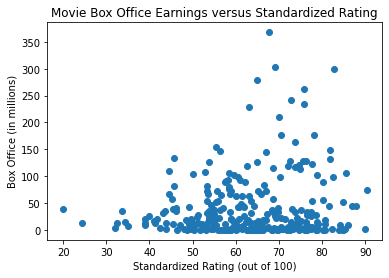

In [30]:
fig, ax = plt.subplots()
x = df_rt['rating_y']
y = df_rt['box_office']
ax.scatter(x,y);
ax.set_xlabel('Standardized Rating (out of 100)')
ax.set_ylabel('Box Office (in millions)')
ax.set_title('Movie Box Office Earnings versus Standardized Rating')

In [31]:
df_rt['fresh'] = df_rt['fresh'].apply(lambda x: round(x,2))
df_rt['rating_y'] = df_rt['rating_y'].apply(lambda x: round(x,2))

In [32]:
df_rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,0.600000,108,Entertainment One,A distinctly gallows take on contemporary fina...,65.70,0.70,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
318,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41.032915,82,Paramount Pictures,"It won't stick with you forever, but you will ...",57.03,0.42,NaN,0,Film4,"August 12, 2008"
427,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,0.224114,123,Sony Pictures Classics,Although Jindabyne's cinematography features s...,71.88,0.73,Heather Huntington,0,ReelzChannel.com,"August 25, 2008"
521,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,0.134904,117,NaN,A captivating film... [Full review in Spanish],62.62,0.25,Laura Hiros,0,NaN,"March 22, 2018"
726,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,2013-12-20,"Mar 18, 2014",$,99.165609,129,Sony Pictures,The movie is great. It is interesting without ...,82.44,0.97,Debbie Baldwin,0,Ladue News,"November 2, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53572,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,2016-02-17,"Jun 21, 2016",$,1.320005,123,Buffalo Films,Mesmerising.,85.33,1.00,Tom Bond,0,Total Film,"December 27, 2016"
53718,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,2005-09-30,"Dec 20, 2005",$,25.335935,119,Universal Pictures,A lovely example of TV sci-fi doing what it do...,77.47,0.81,Tim Brayton,0,Alternate Ending,"September 6, 2017"
53887,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,2012-10-05,"Nov 20, 2012",$,1.416189,129,Eros Entertainment,A capable supporting cast and a fun cameo from...,60.00,1.00,Anil Sinanan,1,Time Out,"October 23, 2017"
53892,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,2002-08-30,"Oct 7, 2003",$,0.794306,97,NaN,With its rusty railroads and dingy metal canis...,84.44,1.00,Jeffrey Overstreet,0,Looking Closer,"December 6, 2004"


In [33]:
df_copy = df_rt

In [34]:
df_copy.dropna(subset=['runtime'], inplace=True)

In [35]:
df_copy['runtime'] = df_copy['runtime'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Movie Box Office Earnings versus Run Time')

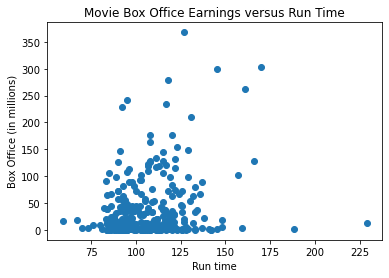

In [36]:
fig, ax = plt.subplots()
x = df_copy['runtime']
y = df_copy['box_office']
ax.scatter(x,y);
ax.set_xlabel('Run time')
ax.set_ylabel('Box Office (in millions)')
ax.set_title('Movie Box Office Earnings versus Run Time')

In [37]:
df_rt.corr()

,id,box_office,runtime,rating_y,fresh,top_critic
id,1.000000,0.053104,0.020323,0.137257,0.114861,0.003170
box_office,0.053104,1.000000,0.220339,0.111655,0.070006,0.008719
runtime,0.020323,0.220339,1.000000,0.251501,0.208196,0.027864
rating_y,0.137257,0.111655,0.251501,1.000000,0.906712,-0.032022
fresh,0.114861,0.070006,0.208196,0.906712,1.000000,-0.002276
top_critic,0.003170,0.008719,0.027864,-0.032022,-0.002276,1.000000


In [38]:
genres = list(df_rt['genre'].value_counts().index[0:88])

In [39]:
def split_genres(genre):
    return genre.split('|')[0]

split_genres(genres[10])

df_rt['genre'] = df_rt['genre'].apply(split_genres)

In [40]:
df_rt[df_rt['genre'] == 'Classics']

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
46240,1744,Director Ron Maxwell and producer Ted Turner r...,PG-13,Classics,NaN,NaN,2003-02-21,"Jul 15, 2003",$,12.9,229,Warner Bros. Pictures,Meticulous Civil War story runs a little long.,51.17,0.13,Nell Minow,0,Common Sense Media,"December 24, 2010"


In [41]:
df_rt_genresub = df_rt[df_rt['genre'].isin(["Action and Adventure", "Animation", "Art House and International", "Comedy", "Documentary", "Drama", "Horror"])]
median_genre_box_office = df_rt_genresub.groupby('genre').median()['box_office']
y = list(median_genre_box_office[0:7])
x = list(median_genre_box_office.index[0:7])

[Text(0, 0, 'Action and Adventure'),
 Text(1, 0, 'Animation'),
 Text(2, 0, 'Art House and International'),
 Text(3, 0, 'Comedy'),
 Text(4, 0, 'Documentary'),
 Text(5, 0, 'Drama'),
 Text(6, 0, 'Horror')]

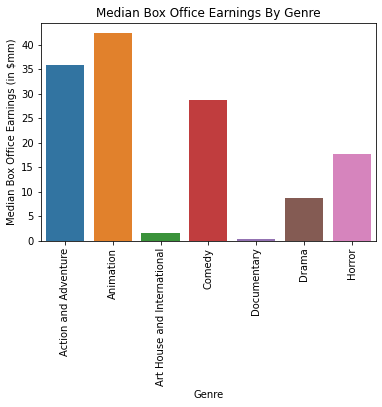

In [42]:
ax = sns.barplot(x=x, y=y)
ax.set_xlabel("Genre")
ax.set_ylabel("Median Box Office Earnings (in $mm)")
ax.set_title("Median Box Office Earnings By Genre")
ax.set_xticklabels(x, rotation=90)

Text(0.5, 1.0, 'Box Office Earnings By Rating')

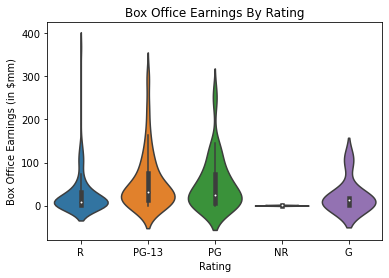

In [43]:
ax = sns.violinplot(x="rating_x", y="box_office", data=df_rt, scale='width');
ax.set_xlabel("Rating")
ax.set_ylabel("Box Office Earnings (in $mm)")
ax.set_title("Box Office Earnings By Rating")